# Load Decryption Key

In [27]:
from view_schema import get_df_from_db, get_images_by_username
from helpers import *

In [28]:
USERS = get_df_from_db("user/users.db")

In [29]:
USERS

,id,username,password_hash,image_1,image_2,image_3,embedding
0,1,armaan,scrypt:32768:8:1$i9At0I8gpYD5v4Nu$c395e77249ec...,b'gAAAAABleCTqJ48cWxt2kiZi9GgSvwBB1VuLoPzAJzyi...,b'gAAAAABleCTrP1jkJUG9VoyWCMoQyQWAWmvJABhVLu0u...,b'gAAAAABleCTsTs4qveHe3oBXMKIRsQKJtY-BbYvXbay4...,b'gAAAAABleCTqougeT65z3aO04HX2bhqOxxHAo55jXF7e...
1,2,foo,scrypt:32768:8:1$xPkInVfCGqPDZPPJ$14f3cd500719...,b'gAAAAABleCNW5MM8Kkpf_e9_jxyMDhPSX0cUxzK38Rbv...,b'gAAAAABleCNXeG-w0hM44u-eg1Ls-jWAV9dq7gPreAfC...,b'gAAAAABleCNYVoPcYopS5xJ26iweT0_j6Iy8HxQJkg9v...,b'gAAAAABleCNWHNzpG7skohT-Lbh6cLWzE3oxat3bpQHK...
2,3,bar,scrypt:32768:8:1$OnaH0h1r0P41NzVS$6032c5649e4a...,b'gAAAAABleCN9T55INWSEQ9PXC6TgGX7DVcgfpAolCXIs...,b'gAAAAABleCN_avIs5LEEJDlljwfrRU2eyr-hclI5T8be...,b'gAAAAABleCN_F34ugc9j8AqYLArD4mpFFl_EnoDp-xag...,b'gAAAAABleCN9sYY83l_0wXcGYVxdWOhYAS4uyJ6Yo6jk...


armaan
Registered Users: ['armaan', 'foo', 'bar']


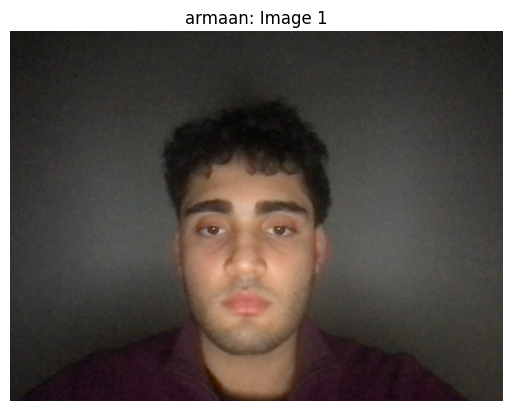

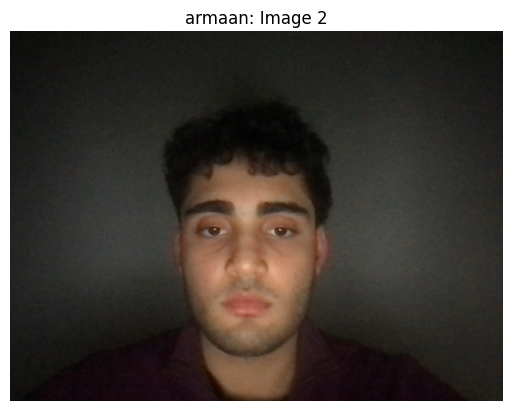

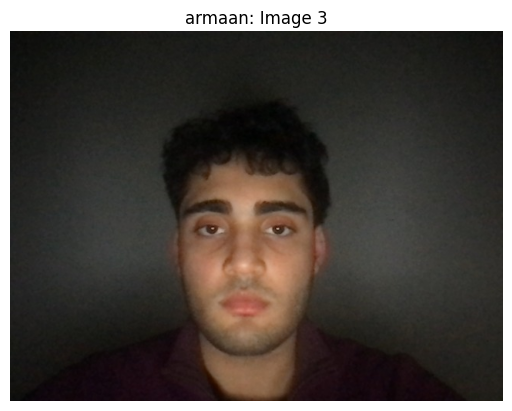


foo
Registered Users: ['armaan', 'foo', 'bar']


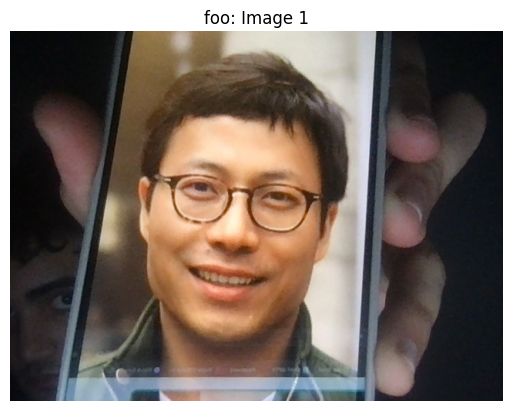

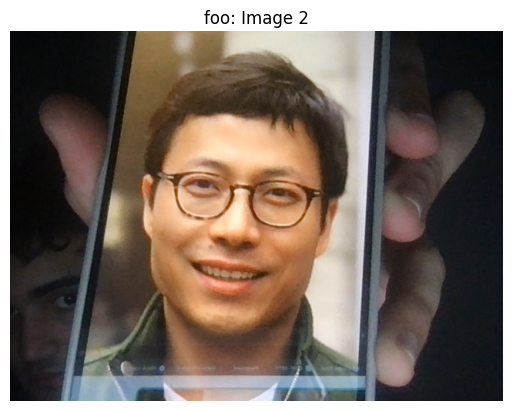

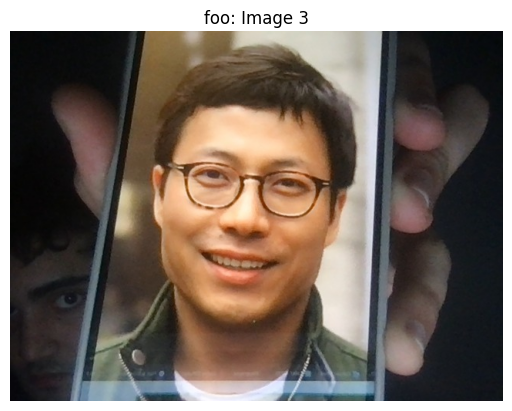


bar
Registered Users: ['armaan', 'foo', 'bar']


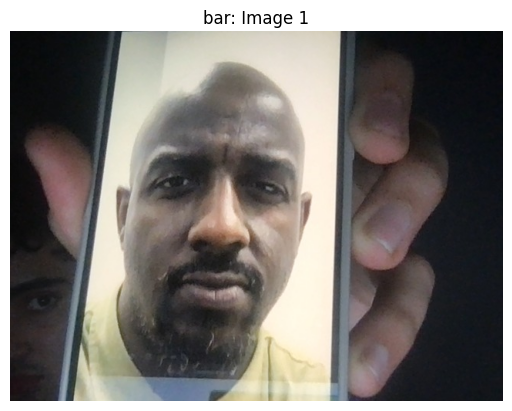

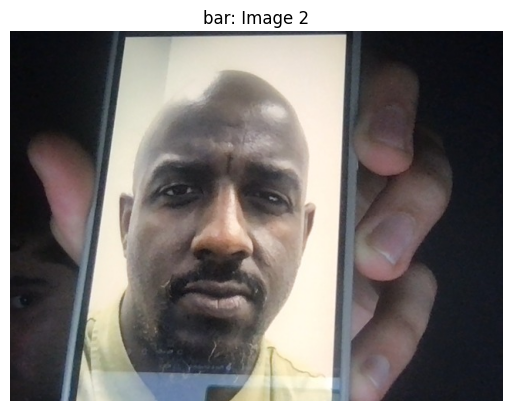

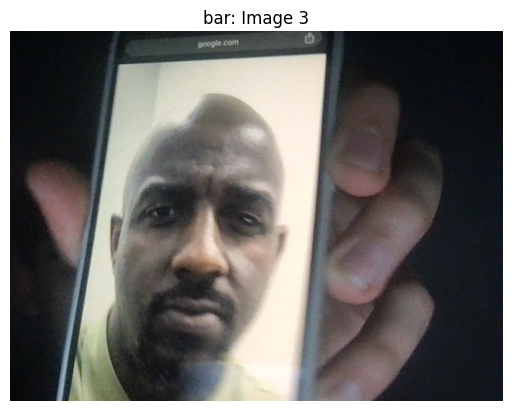

In [32]:
for user in USERS["username"]:
    print(user)
    get_images_by_username(user)[0]
    print("")

NameError: name 'display_image' is not defined